### Intro
#### This script will evaluate the relationship between the number of weekly hours a program has been viewed and the programs weekly rank. I believe there will be a correlation between the two causing the weekly rank to be higher (closer to 1) as the numbr of hours a program is viewed increases. Each week Netflix has a top 10 of their most watched shows and movies. This data contains information for each week globally from 2021- present day. 

#### Hypothesis: If the number of weekly hours a program has been viewed increases, then the weekly rank of the program will be higher (closer to 1).

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# graphs will show without having to call them
%matplotlib inline

### Import Data

In [3]:
#create a path
path = r'C:\Users\marci\OneDrive\Desktop\Career Foundary'

In [5]:
#import data
df = pd.read_csv(os.path.join(path, 'Netflix', '02 Data', 'Original Data', 'global.csv'))

### 02. Data Cleaning

In [6]:
#view the columns
df.columns

Index(['week', 'category', 'weekly_rank', 'show_title', 'season_title',
       'weekly_hours_viewed', 'runtime', 'weekly_views',
       'cumulative_weeks_in_top_10', 'is_staggered_launch',
       'episode_launch_details'],
      dtype='object')

In [10]:
#view the data
df.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-03-17,Films (English),1,Damsel,NaN,93200000,1.8333,50800000.0,2,False,NaN
1,2024-03-17,Films (English),2,Irish Wish,NaN,30600000,1.5667,19500000.0,1,False,NaN
2,2024-03-17,Films (English),3,Alone,NaN,5900000,1.6333,3600000.0,1,False,NaN
3,2024-03-17,Films (English),4,Code 8 Part II,NaN,6000000,1.6667,3600000.0,3,False,NaN
4,2024-03-17,Films (English),5,Noah,NaN,8100000,2.2833,3500000.0,5,False,NaN


In [9]:
#check the shape
df.shape

(5680, 11)

In [11]:
#Rename the columns
df.rename(columns = {'cumulative_weeks_in_top_10' : 'weeks_top_10', 'is_staggered_launch': 'staggered_launch'}, inplace = True)

#### Missing Values

In [12]:
#Check for any missing values
df.isnull().sum()

week                         0
category                     0
weekly_rank                  0
show_title                   0
season_title              2945
weekly_hours_viewed          0
runtime                   4080
weekly_views              4080
weeks_top_10                 0
staggered_launch             0
episode_launch_details    5614
dtype: int64

There are a lot of missing vlaues in the 'runtime' and 'weekly_views' columns which will prevent me from using those columns in my analysis. The data was not included in the data before the week of 6/11/23. 

#### Duplicates check

In [13]:
#check for duplicates
dups = df.duplicated()

In [14]:
dups.shape

(5680,)

In [15]:
#no dups

#### Extreme values check

C:\Users\marci\AppData\Local\Temp\ipykernel_9116\869422417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weekly_rank'], bins=25)
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weekly_rank', ylabel='Density'>

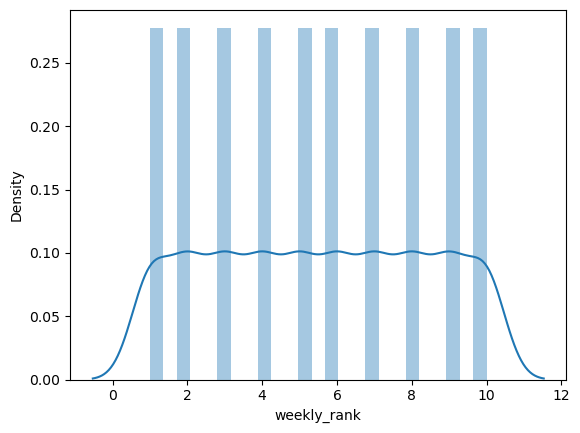

In [17]:
#Show extreme values
sns.distplot(df['weekly_rank'], bins=25)

In [18]:
#check the mean
df['weekly_rank'].mean()

5.5

In [19]:
#check the median
df['weekly_rank'].median()

5.5

In [20]:
#check the max
df['weekly_rank'].max()

10

### 03. Data prep for regression analysis

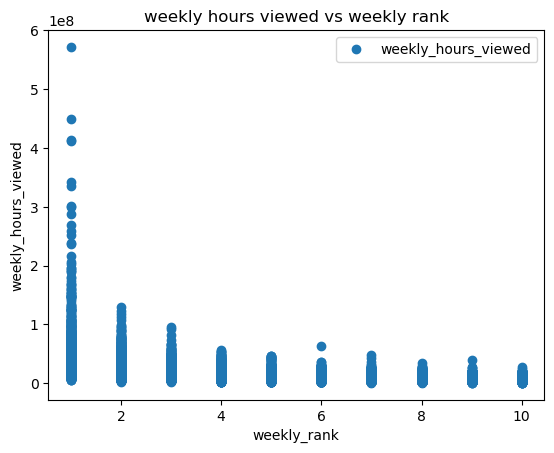

In [22]:
# Create a scatterplot.
df.plot(x = 'weekly_rank', y='weekly_hours_viewed',style='o')
plt.title('weekly hours viewed vs weekly rank')
plt.xlabel('weekly_rank')
plt.ylabel('weekly_hours_viewed')
plt.show()

In [23]:
# Reshape the variables into NumPy
X = df['weekly_rank'].values.reshape(-1,1)
y = df['weekly_hours_viewed'].values.reshape(-1,1)

In [25]:
X

array([[ 1],
       [ 2],
       [ 3],
       ...,
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [26]:
y

array([[93200000],
       [30600000],
       [ 5900000],
       ...,
       [10140000],
       [ 9190000],
       [ 9140000]], dtype=int64)

In [27]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 04. Regression Analysis

In [30]:
# Create a regression object.
regression = LinearRegression()

In [32]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
#Predict the values of y using x

y_predicted = regression.predict(X_test)

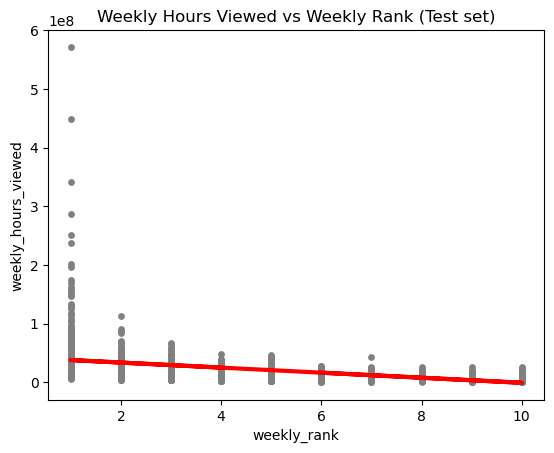

In [34]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Weekly Hours Viewed vs Weekly Rank (Test set)')
plot_test.xlabel('weekly_rank')
plot_test.ylabel('weekly_hours_viewed')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4304723.77832068]]
Mean squared error:  722172073738123.0
R2 score:  0.18733510643500806


In [37]:
y_predicted

array([[16424654.17841626],
       [ -794240.93486647],
       [ 7815206.6217749 ],
       ...,
       [20729377.95673694],
       [37948273.07001968],
       [25034101.73505763]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8930000,1.642465e+07
1,15290000,-7.942409e+05
2,10360000,7.815207e+06
3,9300000,-7.942409e+05
4,6380000,3.510483e+06
5,18100000,2.072938e+07
6,4300000,2.933883e+07
7,90100000,3.794827e+07
8,9920000,2.072938e+07
9,47600000,3.794827e+07


#### Compare how the regression fits the training test

In [39]:
# This is predicting X_train
y_predicted_train = regression.predict(X_train)

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4304723.77832068]]
Mean squared error:  483649472661795.1
R2 score:  0.2399284332537026


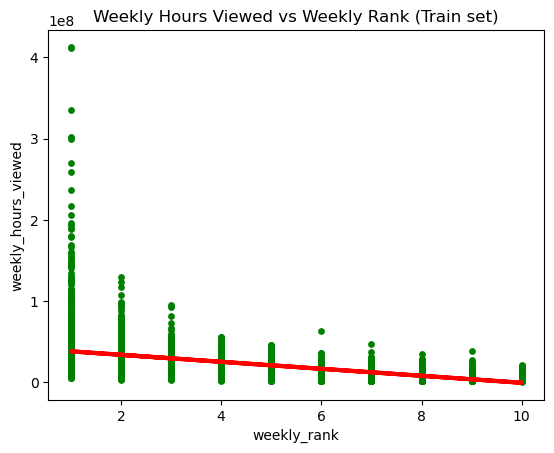

In [42]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Weekly Hours Viewed vs Weekly Rank (Train set)')
plot_test.xlabel('weekly_rank')
plot_test.ylabel('weekly_hours_viewed')
plot_test.show()

Based off the results of the test, I do not think a linear regression is the best test for this data. The MSE value is extremely high and does indicate if the more weekly hours a program is viewed if it will be in the higher ranking for that week. The R2 value shows this model is not a great fit for this data as it is close to 0. The training set performed better than the test set but neither did very well. 